In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA

In [8]:
print("\n=== TAHAP 1: LOAD DATA ===")

df = pd.read_excel("dataset_bersih.xlsx")
print("Dataset dimuat:", df.shape)
print(df.head())



=== TAHAP 1: LOAD DATA ===
Dataset dimuat: (200, 79)
       Usia  Pendapatan  JumlahPinjaman  SkorKredit  \
0  0.060516   -0.035363       -0.848239   -1.318782   
1 -0.244606    1.731852        0.177355   -0.920265   
2  0.467345   -1.510538       -1.278160    0.667579   
3 -0.448020    0.799571        1.652294   -0.204178   
4 -0.346313   -0.016643       -0.410548    1.638966   

   Pekerjaan_Karyawan Swasta  Pekerjaan_Mahasiswa  Pekerjaan_PNS  \
0                      False                False          False   
1                      False                False          False   
2                      False                False          False   
3                      False                False           True   
4                      False                False          False   

   Pekerjaan_Pedagang  Pekerjaan_Petani  Pekerjaan_Sopir  ...  KodeKota_K73  \
0               False             False             True  ...         False   
1               False             False         

In [12]:
# Target untuk klasifikasi
TARGET_CLASS = "StatusKredit_Macet"

# Cek apakah kolom target ada
if TARGET_CLASS not in df.columns:
    raise ValueError(f"Kolom {TARGET_CLASS} tidak ditemukan!")

# Fitur = semua kolom kecuali target
X = df.drop(columns=[TARGET_CLASS])
y_class = df[TARGET_CLASS]


In [14]:
from sklearn.model_selection import train_test_split

print("\n=== TAHAP 2: SPLIT DATA ===")

# Split data hanya untuk klasifikasi
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)

print("Split klasifikasi:")
print("X_train:", X_train_c.shape)
print("X_test :", X_test_c.shape)
print("y_train:", y_train_c.shape)
print("y_test :", y_test_c.shape)



=== TAHAP 2: SPLIT DATA ===
Split klasifikasi:
X_train: (160, 78)
X_test : (40, 78)
y_train: (160,)
y_test : (40,)



=== TAHAP 3: LASSO (Klasifikasi) ===
Pekerjaan_Mahasiswa        0.105836
Pendapatan                 0.101435
Pekerjaan_Tidak Bekerja    0.080169
Pekerjaan_Sopir            0.067623
Pendidikan_SD              0.065254
dtype: float64


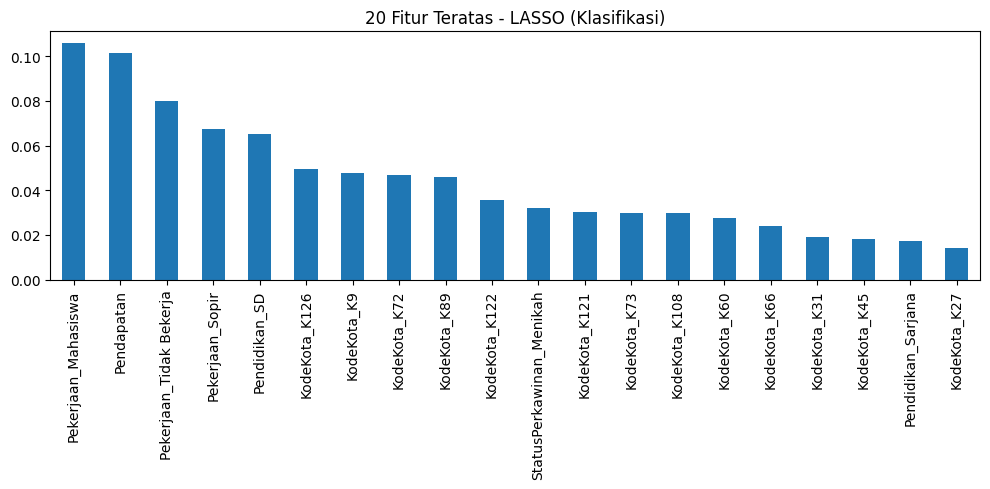


=== TAHAP 3: LASSO (Klasifikasi) ===
Pekerjaan_Mahasiswa        0.105836
Pendapatan                 0.101435
Pekerjaan_Tidak Bekerja    0.080169
Pekerjaan_Sopir            0.067623
Pendidikan_SD              0.065254
dtype: float64


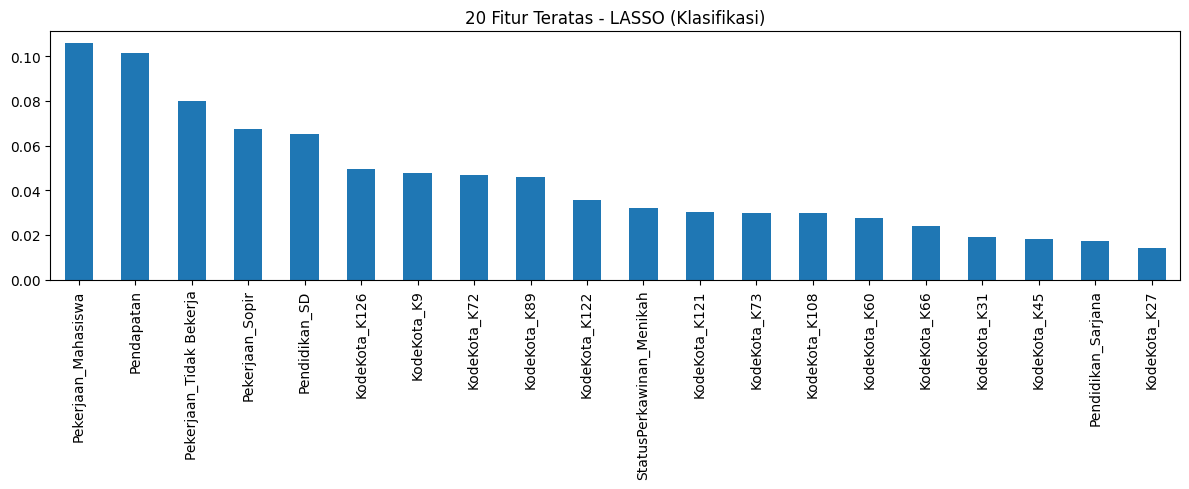

In [17]:
def run_lasso(X_train, y_train, alpha=0.01):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)

    model = Lasso(alpha=alpha)
    model.fit(X_scaled, y_train)

    coef = pd.Series(model.coef_, index=X_train.columns)
    coef_sorted = coef.sort_values(ascending=False)

    return coef_sorted


print("\n=== TAHAP 3: LASSO (Klasifikasi) ===")
lasso_class = run_lasso(X_train_c, y_train_c)
print(lasso_class.head())

plt.figure(figsize=(10,5))
lasso_class.head(20).plot(kind="bar")
plt.title("20 Fitur Teratas - LASSO (Klasifikasi)")
plt.tight_layout()
plt.show()


print("\n=== TAHAP 3: LASSO (Klasifikasi) ===")
lasso_class = run_lasso(X_train_c, y_train_c)
print(lasso_class.head())

plt.figure(figsize=(12,5))
lasso_class.head(20).plot(kind="bar")
plt.title("20 Fitur Teratas - LASSO (Klasifikasi)")
plt.tight_layout()
plt.show()



=== TAHAP 5: PCA (Klasifikasi) ===


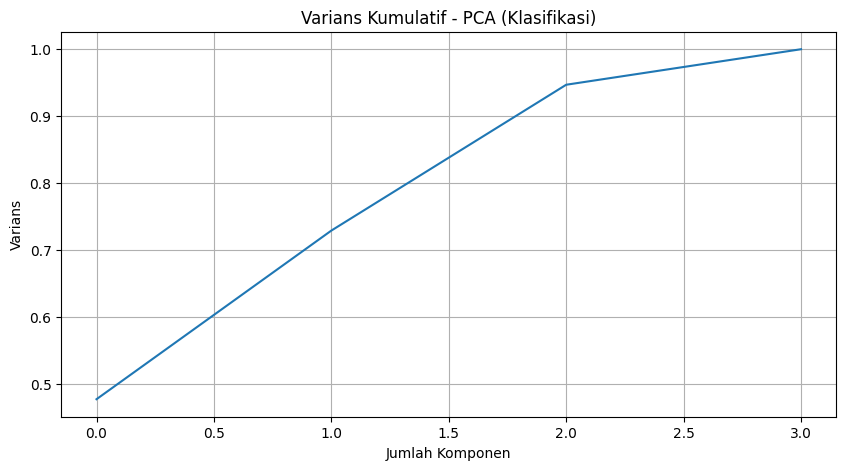

PCA Klasifikasi menghasilkan 4 komponen


In [19]:
def run_pca(X, title):
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    X_num = X[numeric_cols]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_num)

    pca_full = PCA()
    pca_full.fit(X_scaled)

    plt.figure(figsize=(10,5))
    plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
    plt.title(f"Varians Kumulatif - PCA ({title})")
    plt.xlabel("Jumlah Komponen")
    plt.ylabel("Varians")
    plt.grid()
    plt.show()

    # PCA final dengan 95% varians
    pca_final = PCA(n_components=0.95)
    X_pca = pca_final.fit_transform(X_scaled)

    print(f"PCA {title} menghasilkan {pca_final.n_components_} komponen")

    return X_pca, pca_final


print("\n=== TAHAP 5: PCA (Klasifikasi) ===")
X_pca_class, pca_model_class = run_pca(X_train_c, "Klasifikasi")

In [21]:
print("\n=== TAHAP 7: SIMPAN FILE ===")

lasso_class.to_csv("lasso_classification.csv")
pd.DataFrame(X_pca_class).to_csv("pca_classification.csv", index=False)

print("✔ Semua file berhasil disimpan!")
print("- lasso_classification.csv")
print("- pca_classification.csv")

print("\n=== PIPELINE BERHASIL DIJALANKAN TANPA ERROR ===")


=== TAHAP 7: SIMPAN FILE ===
✔ Semua file berhasil disimpan!
- lasso_classification.csv
- pca_classification.csv

=== PIPELINE BERHASIL DIJALANKAN TANPA ERROR ===
